In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_file="test.csv"

In [3]:
data = pd.read_csv(input_file)

data['controlTime'] = data['TotalDuration'] - data['DataPullDuration'] - data['DataPushDuration'] - data['ComputeDuration']

data['dataTime'] = data['DataPullDuration'] + data['DataPushDuration']

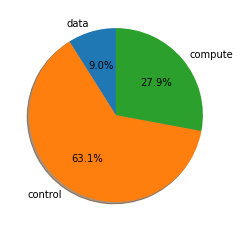

In [4]:
row_total = data[['dataTime', 'controlTime', 'ComputeDuration']].sum(axis=1)

data['dataPercentage'] = (data['dataTime'] / row_total) * 100
data['controlPercentage'] = (data['controlTime'] / row_total) * 100
data['computePercentage'] = (data['ComputeDuration'] / row_total) * 100

averages = data[['dataPercentage', 'controlPercentage', 'computePercentage']].mean()

labels = ['data', 'control', 'compute']
plt.pie(averages,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show() 

In [7]:
data[data["dataPullType"] != "none"]

,tId,dataPullType,FromZone,ToZone,DataSize,TotalDuration,TriggerStepDuration,DataPullDuration,DataPushDuration,ComputeDuration,DataMasterPullCall,DataPeerPullCall,DataMasterPushCall,controlTime,dataTime,dataPercentage,controlPercentage,computePercentage
2,JYvZMGY4N02GWPb9Xg6ZaQ==,remote,cloud1,cloud1,1048576,1966,990,270,26,494,62,196,2,1176,296,15.055951,59.816887,25.127162
3,tgRCBbh8AUiTpGv/ebDcFQ==,local,NaN,NaN,0,1874,974,91,11,555,0,24,1,1217,102,5.442903,64.941302,29.615795
6,373Z/cqpcESq98K32fWk5Q==,remote,cloud1,cloud1,1048576,1966,989,270,12,494,62,196,2,1190,282,14.343845,60.528993,25.127162
7,QZPf/yI9d0a5yo2HndCxUg==,local,NaN,NaN,0,1875,901,91,4,581,0,24,1,1199,95,5.066667,63.946667,30.986667
8,TxUCGwCOHk2ptMozjQ/AUg==,local,NaN,NaN,0,1944,974,91,4,558,0,24,1,1291,95,4.886831,66.409465,28.703704
